# Visualize Spatial Point-based Data and Its Density with Python Basemap

Last edited Dec, 12 2020

### Import required libraries

In [1]:
from pylab import *
import matplotlib.pyplot as plt
from numpy import*
import numpy as np
from scipy import stats
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import cm
import pandas as pd
from pandas import DataFrame
import xlrd

### Read data

In [2]:
data = xlrd.open_workbook(‘dataMCC.xlsx’)
Sheet = data.sheet_by_index(0)

In [3]:
Lat = np.array(Sheet.col_values(11,1))
Lon = np.array(Sheet.col_values(12,1))

### Create 2D array of density

In [4]:
nx,ny = 24,12
lon_bins = np.linspace(90,150,nx+1)
lat_bins = np.linspace(-15,15,ny+1)
lon_bins.shape,lat_bins.shape

((25,), (13,))

In [7]:
density, _, _ = np.histogram2d(Lon,Lat,[lon_bins,lat_bins])

### Declare basemap parameters

In [15]:
map = Basemap(projection='merc',llcrnrlon=90,llcrnrlat=-15,urcrnrlon=150,urcrnrlat=15,resolution='f') # projection, lat/lon extents and resolution of polygons to draw
# resolutions: c - crude, l - low, i - intermediate, h - high, f - full

### Draw the map !

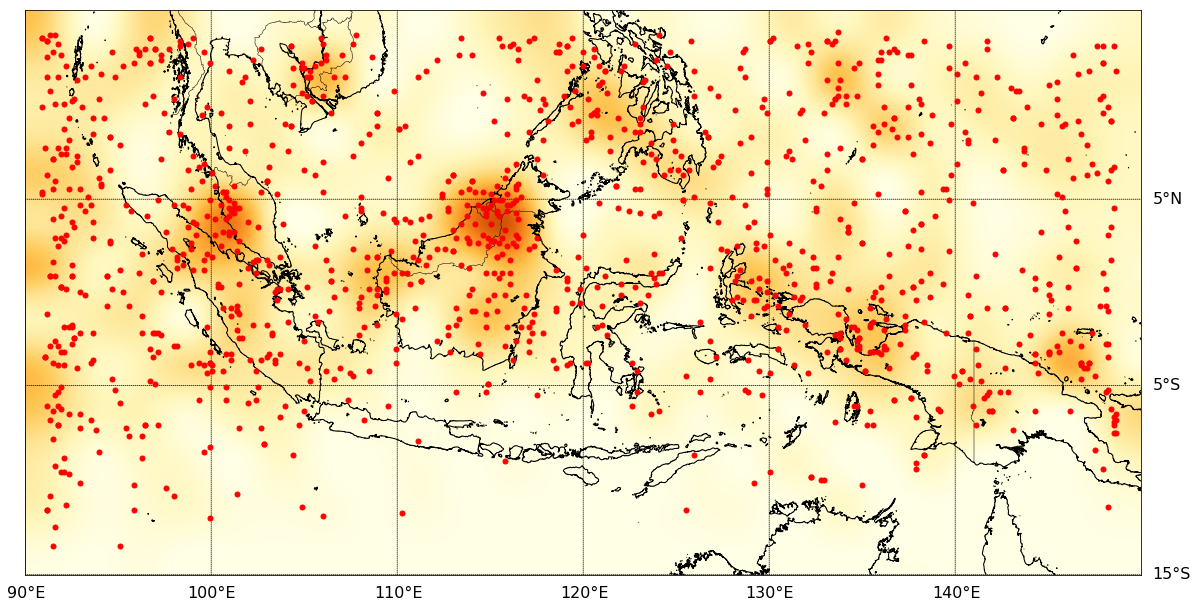

In [90]:
fig=plt.figure(figsize=(20,15))
map.drawcoastlines(linewidth=1)
map.drawstates()
map.drawcountries()
parallels = np.arange(-15,15,10)
map.drawparallels(parallels,labels=[False,True,True,False],fontsize=16)
meridians = np.arange(90,150,10)
map.drawmeridians(meridians,labels=[True,False,False,True],fontsize=16)

a = map.imshow(density.T, interpolation=’spline36', alpha=1, cmap=’YlOrBr’,vmin=0,vmax=34)

cbar = map.colorbar(a,’bottom’, pad=’7%’,extend=’both’)

for lons, lats in zip(Lon, Lat):
    x, y = map.projtran(lons,lats)
    map.plot(x,y,’ro’,markersize=5)